# PHYS 381 - Assignment #2  
#### January 31, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

### 1) Use numpy.polynomial.legendre to generate a single plot showing the first five Legendre polynomials  with order from $N=1$ up to and including $N=5$ between $x=−1$ and $x=+1$

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we define a function that will place objects of type Legendre into a numpy array. Each element of the array holds the unevaluated legendre function of a specific degree.

In [2]:
def genLegPoly(degree):
    """
    Function generates legendre polynomial objects from 1 
    to the specified degree. Each object is successively 
    added to an array, which is returned by the function. 
    
    Params:
        degree: Highest degree of legendre polynomial added 
        to array
    Returns:
        lPolys: A list of Legendre Polynomial Objects 
        with degrees from 1 to the degree specified.
    """
    lPolys = []    
    coeffList = np.array([1])
    for i in range(degree):
        coeffList = np.insert(coeffList,0,0)
        y = np.polynomial.legendre.Legendre(coeffList)
        lPolys = np.append(lPolys,y)
    return lPolys

Next, we create a function that creates a visually appealing plot with legendre polynomials up to a specified degree. Since all degrees of legendre polynomial are defined in the interval [-1,1], the x-values of the plot are built into the function. 

In [3]:
def createLegendrePlot(degree):
    """
    This function, given an input degree, plots legendre
    polynomials from degree zero to that degree. Plot has customized
    size, limits, grid, x-axis labels, title, and legend.
    
    Params:
        degree: How high a degree of legendre polynomials
        you want generated.
    """
    # Set the plot size
    plt.figure(figsize=(10,5))
    
    # Intialize x-values for plot
    x = np.arange(-1,1,0.01)
    
    # The legendre function is evaluated, and plotted, against the set x-values for
    # each degree. A labelled is given to each function in order to indicate in legend. 
    for i in range(degree):
        curve = "N=" + str(i+1)
        plt.plot(x,genLegPoly(degree)[i](x), label = curve)
     
    # For degree less than 10: Add legend to upper left corner, with a shadow, grey in 
    # color, and semi-transparent. The number of elements in the legend is restricted in 
    # order to ensure that the output to reasonable.
    if degree<10:
        legend = plt.legend(loc='upper left', shadow=(True))
        frame = legend.get_frame()
        frame.set_facecolor('#f9f9f9')
        frame.set_alpha(0.6)
    
    # Add grid with solid lines to graph
    plt.grid(linestyle='dashed')

    # Set x and y axis range
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    # Label vertical & horizontal axis and add graph title.
    plt.xlabel('x-values')
    plt.ylabel('$P_{n}(x)$')
    plt.title('Legendre Polynomials of Degrees 0 to %i' % degree)

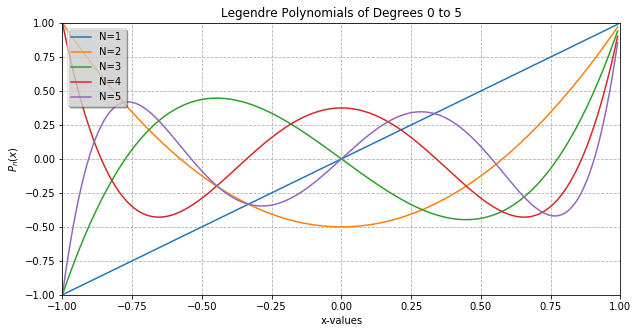

In [4]:
# Call above function to display plot of legendre polynomials
createLegendrePlot(5)

### 2) Use scipy.optimize.brentq to find all of the zeros of the Legendre polynomials with order from $N=1$ up to and including $N=5$.

First we will create a function that can calculate the value of any degree legendre polynomial, at (a) specific value(s) of x. 

In [5]:
def evalLegendre(x, degree):
    """
    This function is a helper function which determines and returns
    the value of a legendre polynomial of specific degree.
    
    Params:
        x: Value(s) for which the legendre function will be evaluated.
        degree: Degree of legendre polynomial.
    Returns:
        value: value(s) of evaluated legendre function  
    """
    degreeList = [0]*degree + [1]
    value = np.polynomial.legendre.legval([x], degreeList)[0]
    return value

Next, we define a function that returns the unevaluated legendre function of a specific degree. We will use evalLegendre and a lambda function to return this function.

In [6]:
def evalLegendreDegree(degree):
    """
    This function is a helper function which returns the unevaluated
    legendre polynomial of specific degree.
    
    Params:
        degree: Degree of legendre polynomial.
    Returns:
        x: unevaluated legendre polynomial of specified degree.  
    """
    
    return lambda x: evalLegendre(x, degree)

Finally, we create a function that will be used to determine the roots of a function. We will include the ability to find roots using either brentq or the secantRootFinder function, implemented in question #4. 

In [7]:
def getAllRoots(func, a, b, numOfDivisions, brentq = True, secantDecimals = 12):
    """
    This function uses either brentq or secantRootFinder to determine the roots
    of a function, on a specified interval. The roots are added to a list, without
    repetition, and returned by function.
    
    Params:
        func: Function for which roots are determined.
        a: Start point of interval in question.
        b: End point of interval.
        numOfDivisions: Integer is used to slice the interval into equally spaced sub-intervals
        brentq: brentq function is used is True, secantRootFinder is used if False.
        secantDecimals: Roots are rounded to this many decimal places.
    Returns:
        roots: List of roots, with repetitions omitted. 
    """
    roots = []
    xRangeIntervals = np.linspace(a, b, numOfDivisions, endpoint = True)
    for numOfIntervals in range(1, len(xRangeIntervals)):
        if brentq:
            try:
                roots.append(opt.brentq(func, xRangeIntervals[numOfIntervals-1], 
                                        xRangeIntervals[numOfIntervals]))
            except:
                pass
        else:
            newValue = round(secantRootFinder(func, xRangeIntervals[numOfIntervals-1], 
                                        xRangeIntervals[numOfIntervals]), secantDecimals)
            roots.append(newValue)
            # List is typecast to a set, to eleminate repetition, then back to list type.
            roots = list(set(roots))
            roots.sort()
    return roots

Using the three functions deifned above we will determine the roots of the Legendre polynomials of degree 1 through 5.

In [8]:
# Create list of unevaluated legendre polynomials for N=1 to N=5
legendreFunctions = []
for degree in range(1, 6):
    legendreFunctions.append(evalLegendreDegree(degree))

print("*** Roots Determined Using brentq ***")

# Each function in our list is passed to getRoots function, where
# brentq determines the zeros. The results are displayed with formatting.
currentDegree = 1
for function in legendreFunctions:
    print("Degree N=", currentDegree)
    for xzero in getAllRoots(function, -1, 1, 100):
        print('\t  x: %5.2f'% xzero, 'y: %9.2e' % function(xzero))
    #print("Current Degree's:", currentDegree, ", Roots:", getAllRoots(function, -1, 1, 100))
    currentDegree+=1

*** Roots Determined Using brentq ***
Degree N= 1
	  x:  0.00 y:  0.00e+00
Degree N= 2
	  x: -0.58 y: -4.18e-14
	  x:  0.58 y: -4.18e-14
Degree N= 3
	  x: -0.77 y: -1.11e-16
	  x:  0.00 y:  0.00e+00
	  x:  0.77 y:  1.11e-16
Degree N= 4
	  x: -0.86 y: -1.11e-16
	  x: -0.34 y:  2.37e-13
	  x:  0.34 y:  2.37e-13
	  x:  0.86 y: -1.11e-16
Degree N= 5
	  x: -0.91 y:  2.74e-13
	  x: -0.54 y: -8.49e-13
	  x:  0.00 y:  0.00e+00
	  x:  0.54 y:  8.49e-13
	  x:  0.91 y: -2.74e-13


### 3) Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

In [9]:
def secantRootFinder(function, xBegin, xEnd, yTolorance = 1e-12, maxIter = 100):
    """
    Function tries to find a root of a function, in a specific interval.
    The secant method is employed to estimate the root, by assuming the 
    function is linear in the interval in question. x-y coordinates of
    root are displayed once the function value is within the tolerance 
    range specified.
    
    Params:
        function: Unevaluated function
        xBegin: Start of interval to be analyzed
        xEnd: End of interval to be analyzed
        yTolerance: Zero interval precision range
        maxIter: Maximum number of iterations before declaring failure.
    """
    # Determine function value at endpoint of interval in question.
    yCheck = abs(function(xEnd))
    
    # Loop runs until the function value lies within the zero range as
    # specified by the yTolerance variable. Root and function value are
    # displayed.
    loopNumber = 0
    while yCheck >= yTolorance and loopNumber < maxIter:
        xOld = xEnd
        xEnd = xEnd - function(xEnd) * (xEnd-xBegin) / (function(xEnd)-function(xBegin))
        xBegin = xOld
        yCheck = abs(function(xEnd))
        loopNumber += 1
    if loopNumber == maxIter:
        return np.nan
    return xEnd

### 4) Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.
Using the getRoots function we can determine the roots with secantRootFinder. It is at this step where we see the true benefit of making getRoots compatible with both brentq and secantRootFinder. That is to say; we have eliminated the need to nearly repeat a segment of code in order to run a process very similar to one previously executed.

In [10]:
# Display the roots of legendre polynomial degree 5.
DEGREE = 5

legendreDegree = evalLegendreDegree(DEGREE)
rootlist = getAllRoots(legendreDegree, -1, 1, 10, False)

print("*** Roots Determined Using secantRootFinder ***")
print("Degree N=", DEGREE)

for xzero in rootlist:
    print('\tx: %5.2f'% xzero, 'y: %9.2e' % evalLegendre(xzero, DEGREE))

*** Roots Determined Using secantRootFinder ***
Degree N= 5
	x: -0.91 y: -2.31e-12
	x: -0.54 y:  7.69e-13
	x:  0.00 y:  0.00e+00
	x:  0.54 y: -7.69e-13
	x:  0.91 y:  2.31e-12


For N=5 we see that both the brentq and secantRootFinder methods both found the roots expected from the graph in question #1. It should be noted that brentq was able to narrow down the root values to a much smaller tolerance than that of secantRootFinder, with run using the current parameters. A y tolerance specified the precision for brentq, and the number of decimal places of the root determined that of the secantRootFinder. It is difficult to compare the "overall" precision of each function, as they processed the data differently. It is however, important to understand the different approach each method offered. Using both these functions gives us a better understanding of the factors involved when determining the value of a function as evaluated by a computer, as well as the precision in which it is determined. 

### 5) Apply the scipy.optimize.newton method function to the “myfunc” function. Use a range of different starting points as given by x = np.linspace(-1.0, 10.0, 101) and find the resulting roots. Discuss your results

In [11]:
# Function defined in the class notes
def myfunc(x, b=0.4):
    return b*x - np.tan(x)

In [12]:
def newtonZeros(x, function, numOfDecimals = 2):
    '''
    Function applies newton method to find roots of a function
    in specified x range. Once a root is found it is rounded and added
    to a list if not already included. The list is returned.
    
    Params:
        x: Array of x-values.
        function: Roots of this function are found in the interval
        specified by the x-values.
        numOfDecimals: Decimal precision to which roots are found.
    Returns:
        zeroList: A list containing all zeros found.
    '''
    # Create empty list for which roots are appended. Repeated roots are omitted from list.
    zeroList = []
    for element in x:
        try:
            xzero = round(opt.newton(function, element, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None), numOfDecimals)
            zeroList.append(xzero)
        except:
             pass
    zeroList = np.unique(zeroList)
    return zeroList

In [13]:
# newtonZeros is called for myfunc in the interval [-1,10].
# Roots found are displayed with formatting.
x = np.linspace(-1.0, 10.0, 101)
xzeros = newtonZeros(x, myfunc)
for entry in xzeros:
    print('Root: x = %5.2f'% entry)

Root: x = -4.17
Root: x =  0.00
Root: x =  4.17
Root: x =  7.53


Upon initial review the newtonZeros function appears to have found the roots of myfunc. We note however, that x= -4.17 is not in the specified range.  This is due to the secent method itself- clearly indicating the start point will not necessarily always yield the closest root. 

In order to verify that these are indeed the correct roots, we will plot myfunc function on the interval [-5,10] with these roots superimposed. Extended the interval to include x=-4.17 is helpful to see if the additional root is indeed valid. To do so we will create a plotting function.

In [14]:
def myFuncPlot():
    '''
    Function plots myfunc from [-5,10] and superimposes a
    scatterplot of the roots using the newtonZeros function.
    '''
    # Set the plot size
    plt.figure(figsize=(14,9))
    
    # Create x-values for the interval [-5,10]
    x = np.linspace( -5, 10, 500)
    
    # Evaluate myfunc at x-values
    y = myfunc(x)
    
    # Disregard values < -20 for plot as to
    # eliminate the asymptotic portion of curve
    y[ y < -20 ] = np.nan
    
    # Add x and y-axis to the plot
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    
    # Plot myfunc function in green
    plt.plot( x, y, 'c', label="$y=myfunc(x)$")
    
    # Plot vertical lines for root values determined form
    # newtonZeros results
    for root in xzeros:
        curve = "x=" + str(root)
        plt.plot([root]*2, [-10,10],'--', label = curve)

    # Plot the list of roots generated form newtonZeros function
    plt.scatter(xzeros, np.zeros(len(xzeros)), marker='D', color='#9B30FF', label="$Roots$")

    # Add title, axis labels, set plot limits, and add legend
    plt.title('myfunc Graph with Calculated Roots')
    plt.xlabel('x (radians)')
    plt.ylabel('y ()')
    plt.xlim( -5, 10 )
    plt.ylim( -10, 10 )
    plt.grid(linestyle='dashed')
    plt.legend(loc='upper right')

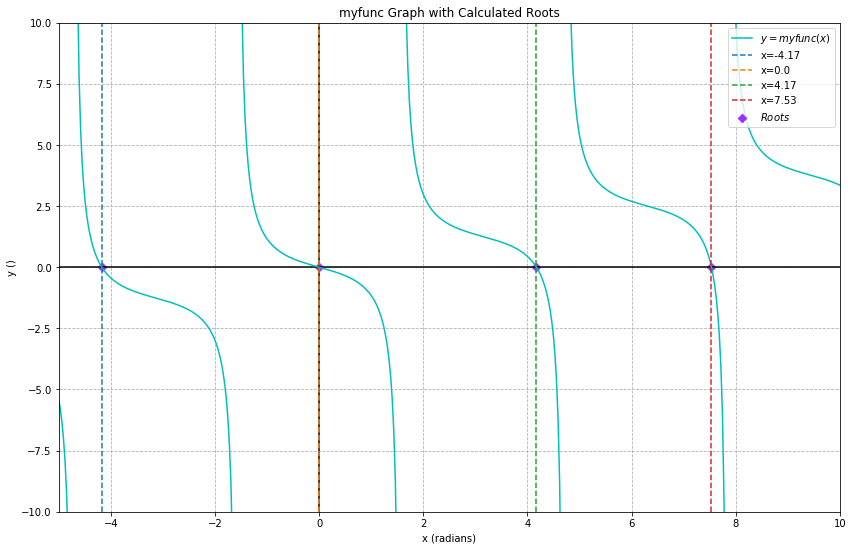

In [15]:
# Call plotting function defined above
myFuncPlot()

It appears from this plot that x=0 x=4.17 and x=7.53 are indeed all the roots of myfunc on the interval [-1,10]. Furthurmore, we can see the x= -4.17 is also a valid root.

Thus, we are able to conclude that the secant method was able to correctly identify the roots of the myfunc function, yet strayed outside of the indicated x interval. This exercise highlights the areas that must be taken into consideration when setting out to determine the value of a function when represented on a computer. Furthuremore, it is essential to properly interpret the results of such calculations.